# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('marketing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [2]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


##### Мы видим, что у нас есть два типа данных в датафрейме (object, int64), но при этом для удобной работы нам нужно преобразовать доход в вещественное число (float), а дату в формат даты (datetime)

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [3]:
df[df.isna().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA


In [4]:
# напишем небольшую функцию для преобразования income в тип float
def float_income(income):
    if type(income) is not float:
        income = income.replace('$', '').split(',')
        income = float(income[0] + income[1])
        return income

In [5]:
df['Income'] = df['Income'].apply(lambda x: float_income(x))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [7]:
# даты заданы в формате mm/dd/yy, сделаем так,чтобы год представлялся четырехзначным числом
def norm_date(date):
    date = date.split('/')
    date = [f'{int(a):02}' for a in date]
    date[2] = '20' + date[2]
    return '/'.join(date)

In [8]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: datetime.datetime.strptime(norm_date(x), '%m/%d/%Y').date())

In [9]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US


## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [10]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

##### В данных 24 пропуска, что составлет 1 процент от выборки. Пропущено значение дохода. Можно заменить пропущенные значения медианными значениями дохода для людей, у которых такое-же семейное положение и уровень образования.

In [11]:
df[~df.isna().any(axis=1)].shape

(2216, 28)

In [12]:
# создадим датафрейм с медианными значениями дохода для каждой группы
temp_df_median = df[~df.isna().any(axis=1)].groupby(['Education', 'Marital_Status']).\
agg('median').reset_index().loc[:, ['Education', 'Marital_Status', 'Income']]

temp_df_nan = df[df.isna().any(axis=1)]
for i in temp_df_nan.index:
    df.loc[i, 'Income'] = temp_df_median[(temp_df_median['Education'] == temp_df_nan.loc[i, 'Education']) & \
                                         (temp_df_median['Marital_Status'] == temp_df_nan.loc[i, 'Marital_Status'])]\
    ['Income'].values[0]

In [13]:
# количество пропусков
df[df.isna().any(axis=1)].shape[0]

0

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

In [14]:
# Выберем числовые признаки и построим для каждого из таких признаков boxplotы

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


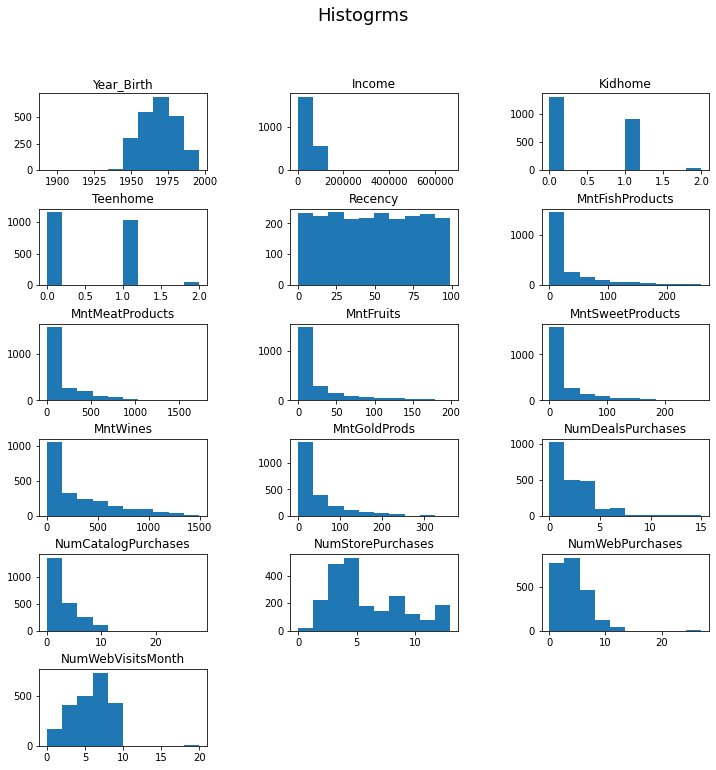

In [16]:
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFishProducts', 'MntMeatProducts', \
                'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', \
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Histogrms', fontsize=18)

for i in range(1, 17):
    ax = plt.subplot(6, 3, i)
    ax.set_title(numeric_cols[i-1])
    ax.hist(df.loc[:, numeric_cols[i-1]])

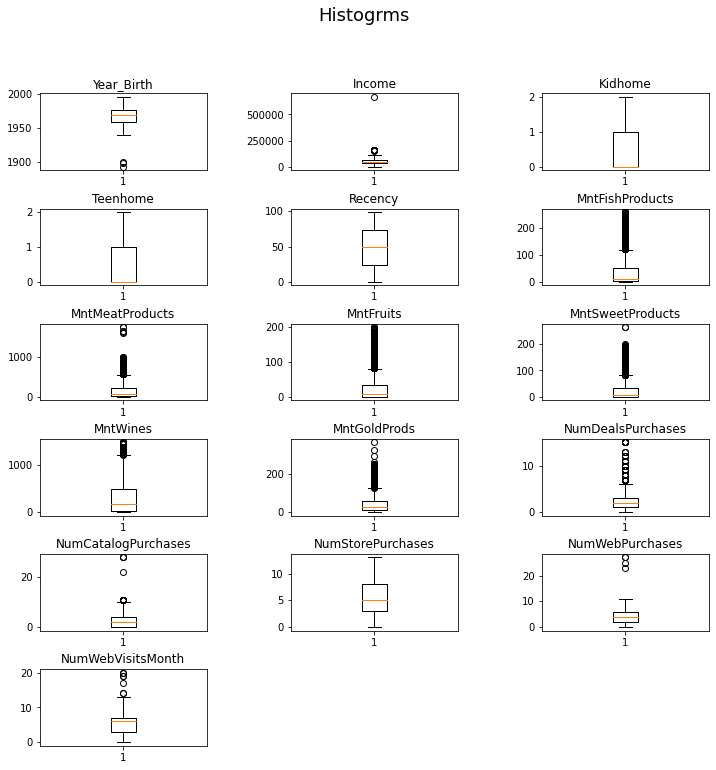

In [17]:
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFishProducts', 'MntMeatProducts', \
                'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', \
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Histogrms', fontsize=18)

for i in range(1, 17):
    ax = plt.subplot(6, 3, i)
    ax.set_title(numeric_cols[i-1])
    ax.boxplot(df.loc[:, numeric_cols[i-1]])

##### Проведем фильтрацию числовых признаков, исключив те числовые признаки, которые отличаются более чем на два стандартных отклонения


In [18]:
cols = ['Year_Birth', 'Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', \
        'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

temp_df = df.copy()
temp_df.loc[:, cols] = (temp_df.loc[:, cols] - temp_df.loc[:, cols].mean()) / temp_df.loc[:, cols].std()


In [19]:
df = df[((temp_df[cols] < 2) & (temp_df[cols] > -2)).all(axis=1)]

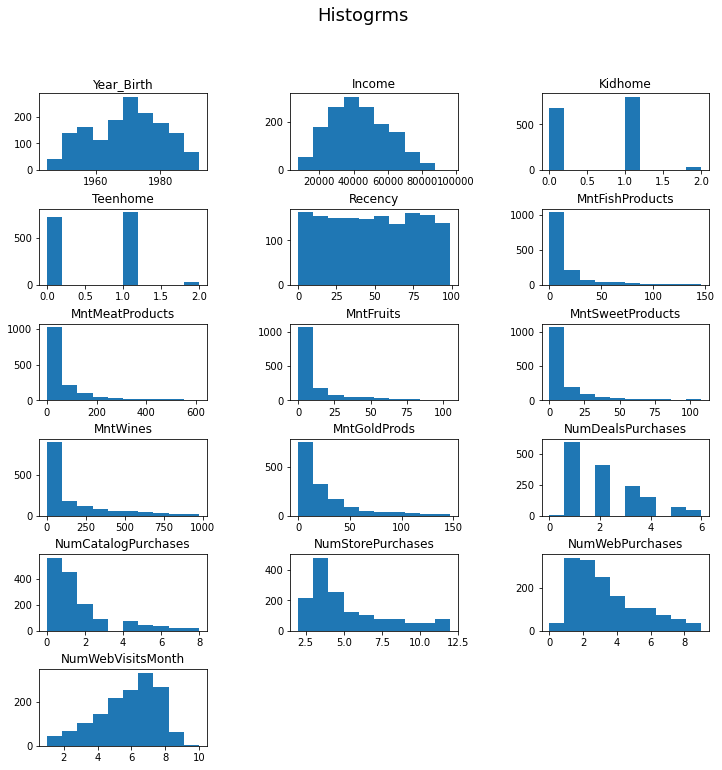

In [20]:
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFishProducts', 'MntMeatProducts', \
                'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', \
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Histogrms', fontsize=18)

for i in range(1, 17):
    ax = plt.subplot(6, 3, i)
    ax.set_title(numeric_cols[i-1])
    ax.hist(df.loc[:, numeric_cols[i-1]])

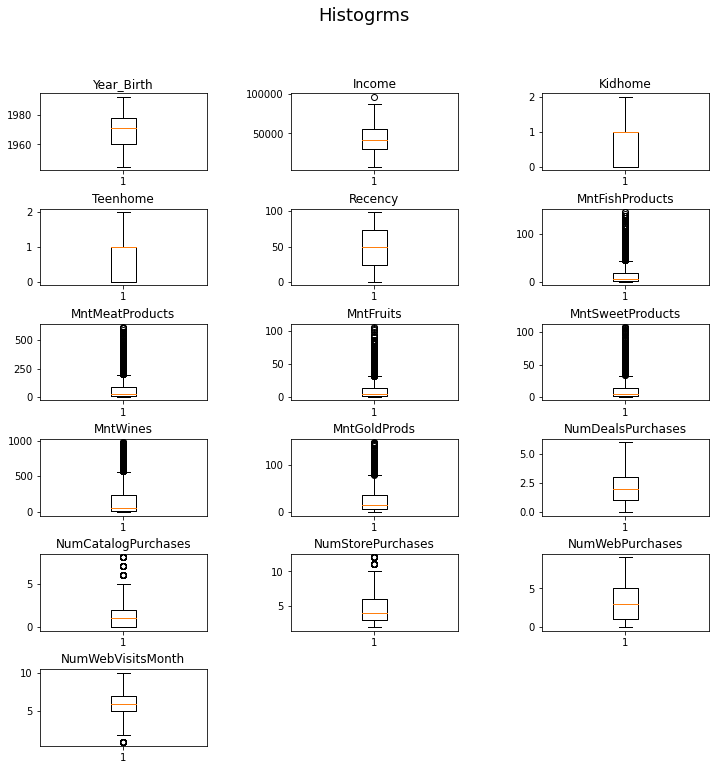

In [21]:
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFishProducts', 'MntMeatProducts', \
                'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', \
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Histogrms', fontsize=18)

for i in range(1, 17):
    ax = plt.subplot(6, 3, i)
    ax.set_title(numeric_cols[i-1])
    ax.boxplot(df.loc[:, numeric_cols[i-1]])

In [22]:
df.shape

(1515, 28)

##### Датасет уменьшился. Теперь в нем 1515 записей

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,SP


In [24]:
# Добавим общее количество детей в доме
df.loc[:, 'Kids'] = df['Kidhome'] + df['Teenhome']

In [25]:
# Добавим количество заказов на сайте, приходящихся на 1 визит сайта. 
def purshases_on_vizits(p, v):
    if p == 0:
        return 0
    else:
        return p / v
    
df['Purshases_on_vizits'] = df.apply(lambda x: purshases_on_vizits(x['NumWebPurchases'], x['NumWebVisitsMonth']), axis=1)

In [26]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Kids,Purshases_on_vizits
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,0,1.400000
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,1,1.500000
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,2,0.142857
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,1,0.428571
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,0,0,0,0,SP,1,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7232,1973,Graduation,Widow,42429.0,0,1,2014-02-11,99,55,...,0,0,0,0,0,0,0,SP,1,0.200000
2234,9977,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,...,0,0,0,0,0,0,0,US,1,2.250000
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,0,US,1,1.250000
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,0,SP,1,0.125000


## Задание 4 (2.5 балла): время статистики!

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515 entries, 1 to 2237
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1515 non-null   int64  
 1   Year_Birth           1515 non-null   int64  
 2   Education            1515 non-null   object 
 3   Marital_Status       1515 non-null   object 
 4   Income               1515 non-null   float64
 5   Kidhome              1515 non-null   int64  
 6   Teenhome             1515 non-null   int64  
 7   Dt_Customer          1515 non-null   object 
 8   Recency              1515 non-null   int64  
 9   MntWines             1515 non-null   int64  
 10  MntFruits            1515 non-null   int64  
 11  MntMeatProducts      1515 non-null   int64  
 12  MntFishProducts      1515 non-null   int64  
 13  MntSweetProducts     1515 non-null   int64  
 14  MntGoldProds         1515 non-null   int64  
 15  NumDealsPurchases    1515 non-null   i

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [28]:
df[df.dtypes[(df.dtypes == object)].index].describe().T

,count,unique,top,freq
Education,1515,5,Graduation,737
Marital_Status,1515,7,Married,587
Dt_Customer,1515,601,2014-03-23,9
Country,1515,8,SP,755


##### Самый частый уровень образования -- 'Graduation', он почти у половины людей из отчищенного датасета. Семейное положение 'Married'  больше чем у трети людей. Почти половина людей из одной страны.

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [29]:
numeric_cols = ['Dt_Customer', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Kids', 'Recency', 'MntFishProducts', 'MntMeatProducts', \
                'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', \
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Purshases_on_vizits']

df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1515.0,1969.499010,11.114653,1945.0,1960.50,1971.000000,1978.0,1992.0
Income,1515.0,43391.613861,16964.562659,7500.0,30552.50,42160.000000,55320.5,96547.0
Kidhome,1515.0,0.578218,0.543656,0.0,0.00,1.000000,1.0,2.0
Teenhome,1515.0,0.552475,0.543108,0.0,0.00,1.000000,1.0,2.0
Kids,1515.0,1.130693,0.688710,0.0,1.00,1.000000,2.0,3.0
Recency,1515.0,48.816502,29.003336,0.0,24.00,49.000000,74.0,99.0
MntFishProducts,1515.0,17.290429,27.512219,0.0,2.00,6.000000,19.0,146.0
MntMeatProducts,1515.0,74.534653,112.171378,0.0,11.00,26.000000,86.0,614.0
MntFruits,1515.0,11.932673,18.815645,0.0,1.00,4.000000,13.0,105.0
MntSweetProducts,1515.0,12.064026,19.444885,0.0,1.00,4.000000,14.0,108.0


##### Можно сделать вывод, что в датасете после фильтрации медианный год рождения 1971, при этом стандартное отклонение относительно небольшое. Можно сделать вывод, что  рекламные компании были направлены всего на несколько возрастных групп. 

##### Судя по значению параметра колиество заказов на 1 заход в приложение можно сделать вывод, что в среднем 70 процентов посещений сайта кончаются заказом. При этом только у 25% людей на в среднем на каждый заход приходится >= 1 заказа.

##### В среднем доход составляет 43392 доллара в год, при этом половина доходов всех граждан лежит в достаточно небольшом диапозоне в 24768 долларов, что говорит нам о том, что в целом в датасете представлены люди с соизмеримым уровнем достстка.

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

##### Для исследования будут выбраны эти три количественных признака:
* Income
* NumWebPurchases
* Purshases_on_vizits

In [30]:
df[['Marital_Status', 'Education', 'Income', 'NumWebPurchases', 'Purshases_on_vizits']]\
.groupby(['Marital_Status', 'Education']).agg('mean').reset_index().sort_values(by=['Income'], ascending=False)

,Marital_Status,Education,Income,NumWebPurchases,Purshases_on_vizits
26,Widow,PhD,53259.916667,3.833333,0.924901
25,Widow,Master,51981.200000,5.400000,0.876429
21,Together,PhD,50214.517647,3.741176,0.926111
22,Widow,2n Cycle,49444.250000,3.500000,0.825000
11,Married,PhD,48748.556911,3.674797,0.812263
27,YOLO,PhD,48432.000000,7.000000,0.875000
10,Married,Master,47193.048544,3.339806,0.770250
6,Divorced,PhD,46926.939394,3.121212,0.764430
24,Widow,Graduation,45913.285714,3.238095,0.815136
16,Single,PhD,45443.552239,3.059701,0.609210


##### Мы видим, что обладая в среднем самым большим доходом, вдовы и вдовцы довольно активно делают заказы. Почти на каждый визит приходится заказ. 

In [31]:
df[['Country', 'Income', 'NumWebPurchases', 'Purshases_on_vizits']]\
.groupby('Country').agg('mean').reset_index().sort_values(by=['Purshases_on_vizits'], ascending=False)

,Country,Income,NumWebPurchases,Purshases_on_vizits
7,US,48314.342105,3.842105,0.905049
5,SA,43638.924883,3.244131,0.723867
2,GER,44244.691358,3.135802,0.713659
6,SP,43128.807285,3.152318,0.702945
3,IND,41290.056075,3.411215,0.701135
0,AUS,44206.321429,3.214286,0.689665
1,CA,42373.450000,3.364706,0.632383
4,ME,52614.000000,2.000000,0.250000


##### Для людей из англии справелдиво утвердждение, что почти на каждый визит в приложение приходится 1 заказ

In [32]:
df[['Country', 'Purshases_on_vizits']]\
.groupby('Country').agg('count').reset_index().sort_values(by=['Purshases_on_vizits'], ascending=False)

,Country,Purshases_on_vizits
6,SP,755
5,SA,213
1,CA,170
0,AUS,112
3,IND,107
2,GER,81
7,US,76
4,ME,1


##### Нельзя даать оценки для страны 'ME', так как в отфильтрованнх данных есть всего 1 запись с этой страной. 

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [33]:
'''
https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/
'''

numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Kids', 'Recency', 'MntFishProducts', 'MntMeatProducts', \
                'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases', \
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Purshases_on_vizits']
corr_matrix = df[numeric_cols].corr(method='pearson')
corr_matrix = corr_matrix.unstack().sort_values()

In [34]:
for i in range(0, 5, 2):
    print(f'{corr_matrix.index[i][0]}, {corr_matrix.index[i][1]}: {corr_matrix[i]}')

Purshases_on_vizits, NumWebVisitsMonth: -0.6296225905846439
NumWebVisitsMonth, Income: -0.5792320617974785
NumStorePurchases, Kidhome: -0.5208318728897975


## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

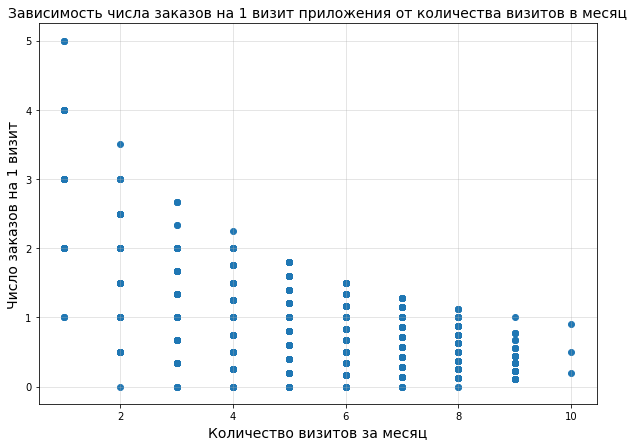

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(df['NumWebVisitsMonth'], df['Purshases_on_vizits'])
plt.title('Зависимость числа заказов на 1 визит приложения от количества визитов в месяц', fontsize=14)
plt.xlabel('Количество визитов за месяц', fontsize=14)
plt.ylabel('Число заказов на 1 визит', fontsize=14)
plt.grid(alpha=0.4)

##### Данная зависимость говорит нам о том, что много заказов за 1 визит обычно происходит в тех случаях, когда визитов было мало. Это может быть связано с тем, что некоторые не закрывают сайт или приложение. Либо периодически делают заказы не себе.

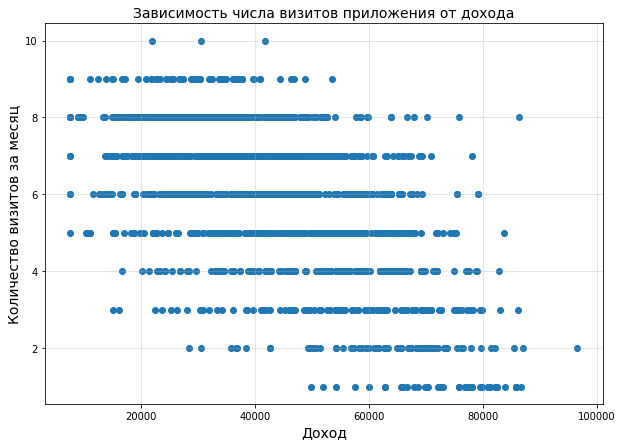

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Income'], df['NumWebVisitsMonth'])
plt.title('Зависимость числа визитов приложения от дохода', fontsize=14)
plt.ylabel('Количество визитов за месяц', fontsize=14)
plt.xlabel('Доход', fontsize=14)
plt.grid(alpha=0.4)

##### Можно сделать вывод, что в том случае, чем выше доход человека, тем меньше он посещает сайт / заходит в приложение. Это может быть связано с тем, что люди с более высоким доходом предпочитают другие сервисы

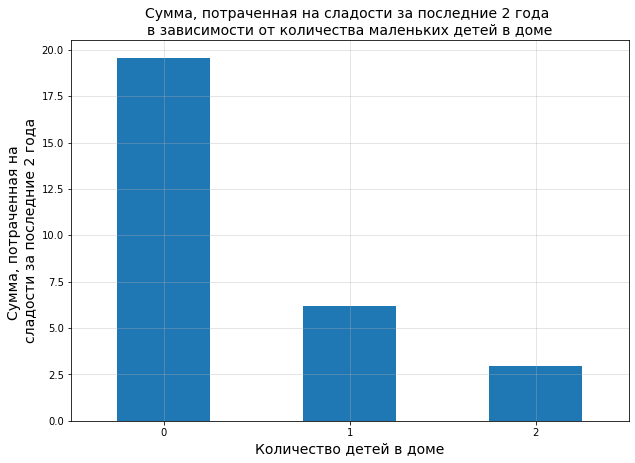

In [37]:
temp_df = df[['Kidhome', 'MntSweetProducts']].groupby('Kidhome').agg('mean').reset_index()

temp_df.plot.bar(x='Kidhome', legend=None, figsize=(10, 7))
plt.title('Сумма, потраченная на сладости за последние 2 года \nв зависимости от количества маленьких детей в доме', fontsize=14)
plt.ylabel('Сумма, потраченная на \nсладости за последние 2 года', fontsize=14)
plt.xlabel('Количество детей в доме', fontsize=14)
plt.xticks(rotation=0)
plt.grid(alpha=0.4)

##### Удивительно, но количество потраченных денег на сладости  тем меньшн, чем меньше маленьких детей в доме. Это может быть связано с тем, что люди с детьми покупают сладостив в других местах.

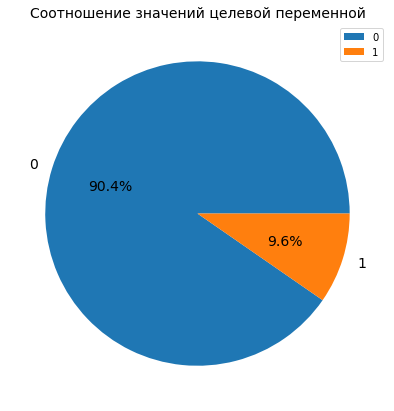

In [38]:
plt.figure(figsize=(10, 7))
plt.title('Соотношение значений целевой переменной', fontsize=14)
plt.pie(df.groupby('Response').agg('count').reset_index().sort_values(by=['Response'], ascending=True)['Kids'], \
        autopct='%1.1f%%', textprops={'fontsize': 14}, labels=[0, 1])
plt.legend()
plt.show()

##### Такие результаты наглядно представляют нам долю успеха в рекламной компании

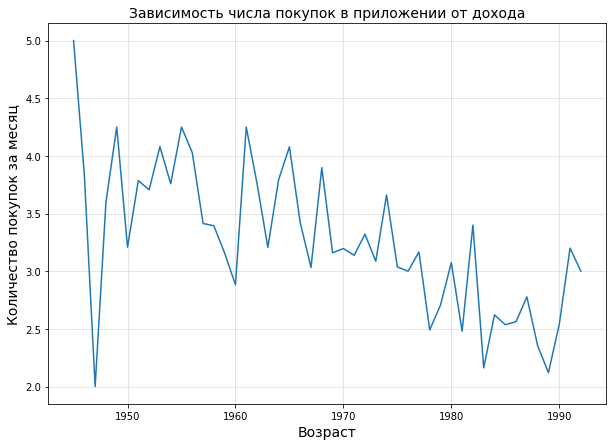

In [39]:
temp_df = df.groupby(['Year_Birth']).agg('mean').reset_index()

plt.figure(figsize=(10, 7))
plt.plot(temp_df['Year_Birth'], temp_df['NumWebPurchases'])
plt.title('Зависимость числа покупок в приложении от дохода', fontsize=14)
plt.ylabel('Количество покупок за месяц', fontsize=14)
plt.xlabel('Возраст', fontsize=14)
plt.grid(alpha=0.4)

##### Мы наблюдаем снижение числа покупок на сайте за месяц с уменьшением возраста. Это можно свзяать с тем, что молодые люди используют другие сервисы для заказов, либо они предпочитают самостоятельно посещать кафе и рестораны по сравнению со старшим поколением

In [40]:
target = 'Response'
y = df[target]
X = df.drop(columns=[target])

encoder = ce.LeaveOneOutEncoder(return_df=True)
X_encode = encoder.fit_transform(X, y)
df_encode = X_encode.join(y)
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515 entries, 1 to 2237
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1515 non-null   int64  
 1   Year_Birth           1515 non-null   int64  
 2   Education            1515 non-null   float64
 3   Marital_Status       1515 non-null   float64
 4   Income               1515 non-null   float64
 5   Kidhome              1515 non-null   int64  
 6   Teenhome             1515 non-null   int64  
 7   Dt_Customer          1515 non-null   float64
 8   Recency              1515 non-null   int64  
 9   MntWines             1515 non-null   int64  
 10  MntFruits            1515 non-null   int64  
 11  MntMeatProducts      1515 non-null   int64  
 12  MntFishProducts      1515 non-null   int64  
 13  MntSweetProducts     1515 non-null   int64  
 14  MntGoldProds         1515 non-null   int64  
 15  NumDealsPurchases    1515 non-null   i

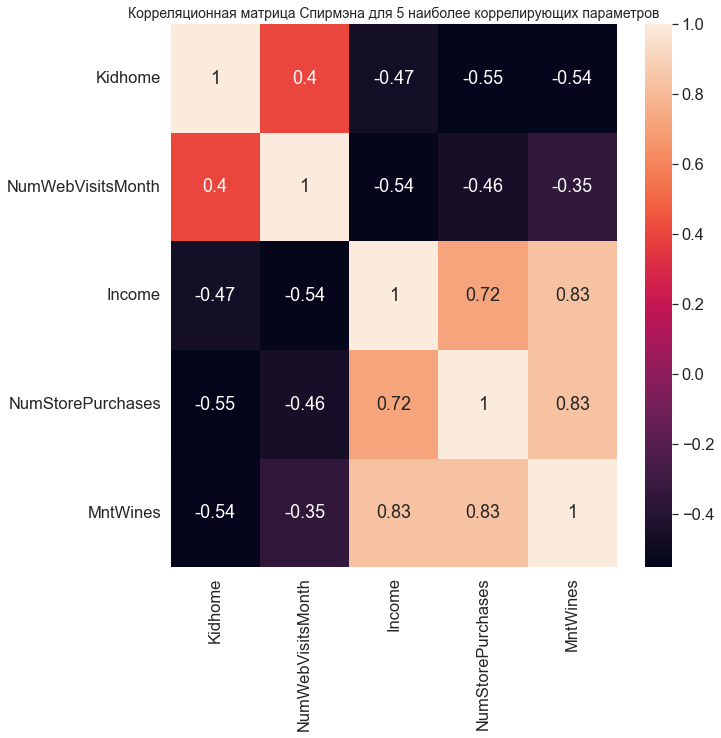

In [41]:
corr_matrix = df_encode.corr(method='spearman')

best_params = set()
params = corr_matrix.unstack().sort_values(ascending=True)
for i in range(0, 6, 2):
    best_params = best_params | {params.index[i][0], params.index[i][1]}
    
best_params = list(best_params)
corr_matrix = df_encode.loc[:, best_params].corr(method='spearman')
sns.set(rc={'figure.figsize':(10, 10)})
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица Спирмэна для 5 наиболее коррелирующих параметров', fontsize=14)
plt.show()

##### Мы видим довольно большие значения корреляций количества потраченных денег на мясо, вина, покупки через каталоги и покупки в магазинах. Эти значения можно использовать для понимания модели поведения покупателей

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

##### Посмотрим на зависимость количество потраченных денге на алкоголь в зависимости от количества детей дома

Text(0, 0.5, 'Доля трат на алколь от доходов')

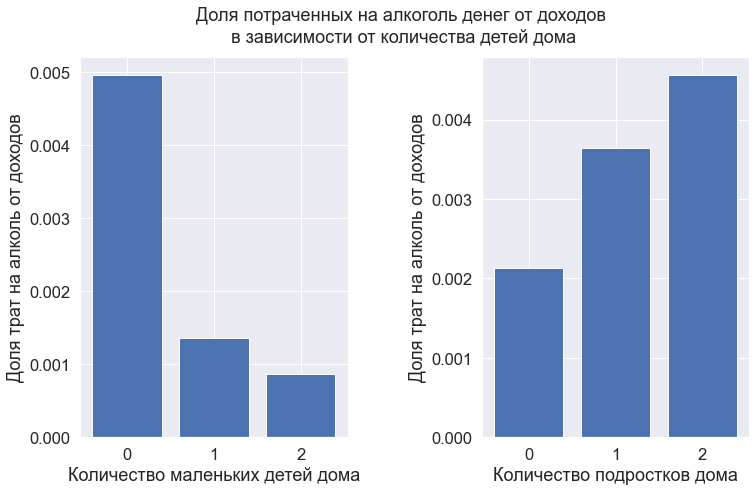

In [93]:
df['MntWines_relatively'] = df['MntWines'] / df['Income']

plt.figure(figsize=(12, 7))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Доля потраченных на алкоголь денег от доходов \nв зависимости от количества детей дома', fontsize=18)

df['MntWines_relatively'] = df['MntWines'] / df['Income']
temp_df = df[['Kidhome', 'MntWines_relatively']].groupby('Kidhome').agg('mean').reset_index()
plt.subplot(1, 2, 1)
plt.bar(temp_df['Kidhome'], temp_df['MntWines_relatively'])
plt.xlabel('Количество маленьких детей дома')
plt.ylabel('Доля трат на алколь от доходов')

temp_df = df[['Teenhome', 'MntWines_relatively']].groupby('Teenhome').agg('mean').reset_index()
plt.subplot(1, 2, 2)
plt.bar(temp_df['Teenhome'], temp_df['MntWines_relatively'])
plt.xlabel('Количество подростков дома')
plt.ylabel('Доля трат на алколь от доходов')


##### Мы видим интересную картину - в случае мальньких детей доля потраченных на алкоголь денег уменьшается с увеличением количества детей, а в случае с подростками ситуация обстоит иначе. Возможно это связано с тем, что из-за необходисоти уделять время маленьким детям не остается времени, сил и денег на покупку алкоголя. В случае подростков рост доли потраченных на алкоголь денег может расти из-за трудности воспитания подростков и накапливанию стресса, который люди запивают.

##### Ради интереса посмотрим на долю потраченных на алкоголь денег в зависимости от общего числа детей

Text(0, 0.5, 'Доля трат на алколь от доходов')

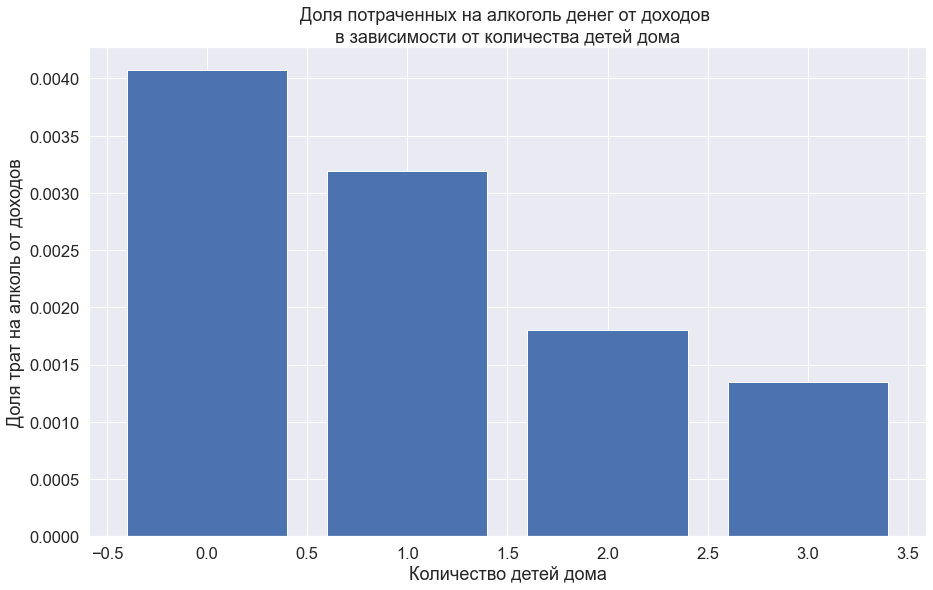

In [106]:
temp_df = df[['Kids', 'MntWines_relatively']].groupby('Kids').agg('mean').reset_index()

plt.figure(figsize=(15, 9))

plt.title('Доля потраченных на алкоголь денег от доходов \nв зависимости от количества детей дома')
plt.bar(temp_df['Kids'], temp_df['MntWines_relatively'])
plt.xlabel('Количество детей дома')
plt.ylabel('Доля трат на алколь от доходов')

In [109]:
df.groupby('Kidhome').agg('count').reset_index()[['Kidhome', 'ID']]

,Kidhome,ID
0,0,678
1,1,798
2,2,39


In [110]:
df.groupby('Teenhome').agg('count').reset_index()[['Teenhome', 'ID']]

,Teenhome,ID
0,0,714
1,1,765
2,2,36


In [112]:
df.groupby('Kids').agg('count').reset_index()[['Kids', 'ID']]

,Kids,ID
0,0,234
1,1,888
2,2,354
3,3,39


#####  Мы видим, что распределение подростков и маленьких детей примерно одинаково. 

##### В итоге получается, что мы имеем две абсолютно разные тенденции для маленьких детей и подростков, которые могут объясняться ососбенностями воспитания маленьких детей и подростков.